In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_excel('Libro2.xlsx')
df

,Unnamed: 0,Municipio,Departamento,Año,Mes,Día,Sexo,Etnia,Ocupación,Calidad_de_la_Víctima_o_la_Baja,Tipo_de_Población_Vulnerable,Militante_Político,Situación_Actual_de_la_Víctima,Circunstancia_Muerte_en_Cautiverio,Tipo_de_Liberación,Días_de_Cautiverio,Edad,Amenaza_o_Intimidación,Confinamiento_o_Restricción_a_la_Movilidad,Desplazamiento_Forzado,Exigencia_para_la_Liberación,Extorsión,Finalidad_del_Secuestro,Lesionados_Civiles,Modalidad,Modalidad_de_Secuestro,Otro_Hecho_Simultáneo,Pillaje,Región,Tipo_de_Secuestro,Tortura,Total_de_Víctimas_del_Caso,Violencia_Basada_en_Género,Presunto_Responsable
0,1,627,13,2005,8,2,0,1,16,0,16,2,7,0,2,215,3,0,0,0,4,0,5,0,13,2,45,0,11,3,1,0,0,11
1,2,673,19,2006,12,21,0,1,4,0,37,2,7,0,6,183,9,0,0,0,1,0,2,0,4,2,26,0,30,1,0,0,0,11
2,3,823,24,1998,3,28,0,1,8,0,16,2,7,0,2,58,9,0,0,0,4,0,5,0,4,3,26,0,16,2,0,14,0,11
3,4,644,28,2000,1,9,0,1,30,0,16,2,7,0,2,2,2,0,0,0,4,0,5,0,4,2,26,0,31,3,13,0,0,11
4,5,644,28,1989,11,11,0,1,13,0,16,2,7,0,2,203,9,0,0,0,4,0,5,0,1,2,26,0,31,3,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,563,286,9,1999,0,0,0,1,27,0,16,2,7,1,2,335,9,0,0,0,4,0,5,0,4,2,26,0,24,3,0,0,0,9
233,564,779,29,2002,12,2,0,1,27,0,16,2,7,1,2,74,9,0,0,0,4,0,0,0,4,2,26,0,31,3,0,0,0,9
234,568,805,11,2003,3,15,2,1,27,0,16,2,8,1,2,335,9,0,0,0,1,0,2,0,4,2,26,0,31,1,1,0,0,9
235,587,5,6,2003,3,25,2,1,27,0,16,2,8,1,2,335,9,1,0,0,4,0,5,0,1,2,26,0,62,3,0,0,0,9


In [ ]:
X = df.iloc[:].values
y = df.iloc[:, 33].values
print (y)

NameError: ignored

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pr_PCA = pca.fit_transform(df)
X_pca = pr_PCA

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


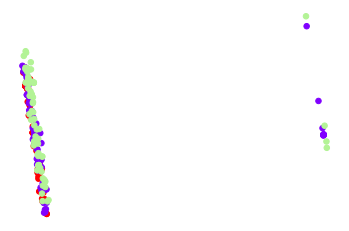

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X_pca, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


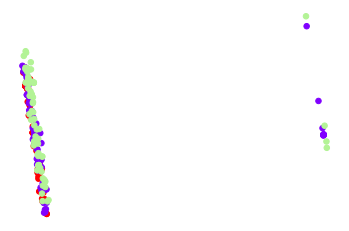

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(max_features=2)
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.7, random_state=1)
bag.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


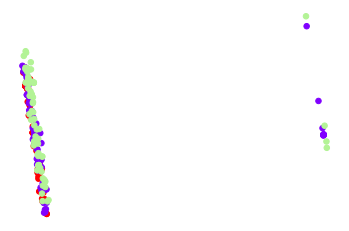

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           6       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        22

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



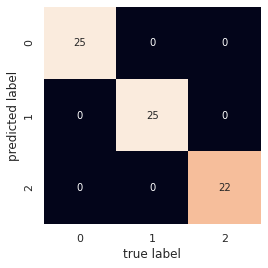

In [ ]:
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');